In [1]:
# https://jobs.axa.co.uk/job-description/AXAI2153?aid=17281
# Dr. Nathan E. Barlow

# Summary of analysis of wine data
The red and white wine data has 11 base features which is categorized into wine quality.

step 1: Open and clean data

step 2: First look at statistics

step 3: Feature engineering

step 4: Model building

step 5: Validation

step 6: Conclusions

# Step 1

In [2]:
# Standrad imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read in data using pandas
import pandas as pd
red_file = r'C:\Users\Nathan\Downloads\winequality-white.csv'
white_file = r'C:\Users\Nathan\Downloads\winequality-red.csv'

red = pd.read_csv(red_file, sep=';', index_col=None)
white = pd.read_csv(white_file, sep=';', index_col=None)

red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Some of the noteworthy items we can see right from the start is that there are 4898 samples (in the red wine data set), the quality ranges from 3 to 9 and all the data is numerical (no categorical data). Though since we are training the model on quality, it is best to see if there is a class imbalance.

In [5]:
# get column names
red.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [6]:
red['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
white['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Here we see that ther are a lot of mid range wines (rating of 5 and 6) but very few low and high rated wines. It would make sense then to bin the data less than a rating of 6 for low, a rating of 6 as mid, and a rating above 6 as high.

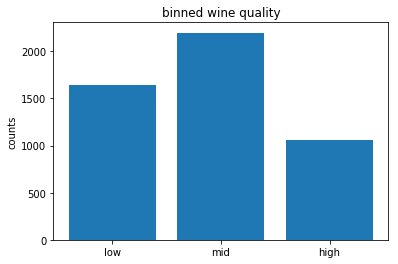

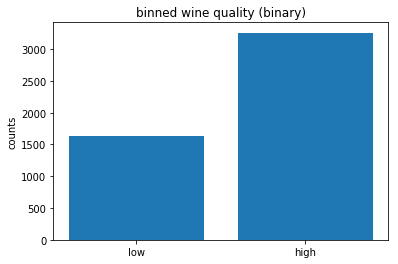

In [196]:
# initialize y binning and counts
y_binned = []
count_low = 0
count_mid = 0
count_high = 0
# enuermate the list of quality

for k,r in enumerate(red['quality']):
    if r < 6:
        y_binned.append(0)
        count_low +=1
    elif r == 6:
        y_binned.append(1)
        count_mid +=1
    elif r >6:
        y_binned.append(2)
        count_high +=1

# turn list into numpy array
y_binned = np.array(y_binned)
plt.bar(np.arange(3), [count_low, count_mid, count_high])
plt.xticks(np.arange(3), ['low', 'mid', 'high'])
plt.ylabel('counts')
plt.title('binned wine quality')
plt.show()
red['binned quality'] = y_binned


# We can also look at the simpler binary case:
y_binned_binary = []
count_low = 0
count_high = 0
# enuermate the list of quality

for k,r in enumerate(red['quality']):
    if r <= 5:
        y_binned_binary.append(0)
        count_low +=1
    else:
        y_binned_binary.append(1)
        count_high +=1
        
# turn list into numpy array
y_binned_binary = np.array(y_binned_binary)
plt.bar(np.arange(2), [count_low, count_high])
plt.xticks(np.arange(2), ['low', 'high'])
plt.ylabel('counts')
plt.title('binned wine quality (binary)')
plt.show()
red['binary binned quality'] = y_binned_binary


In [197]:
print('now we have {} colunns'.format(red.shape[1]))
red.head()

now we have 14 colunns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binned quality,binary binned quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [198]:
red[red.columns.values[:-3]].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


# Step 2
Now that we have our y variable set, lets get more information and look at some more basic statistics.

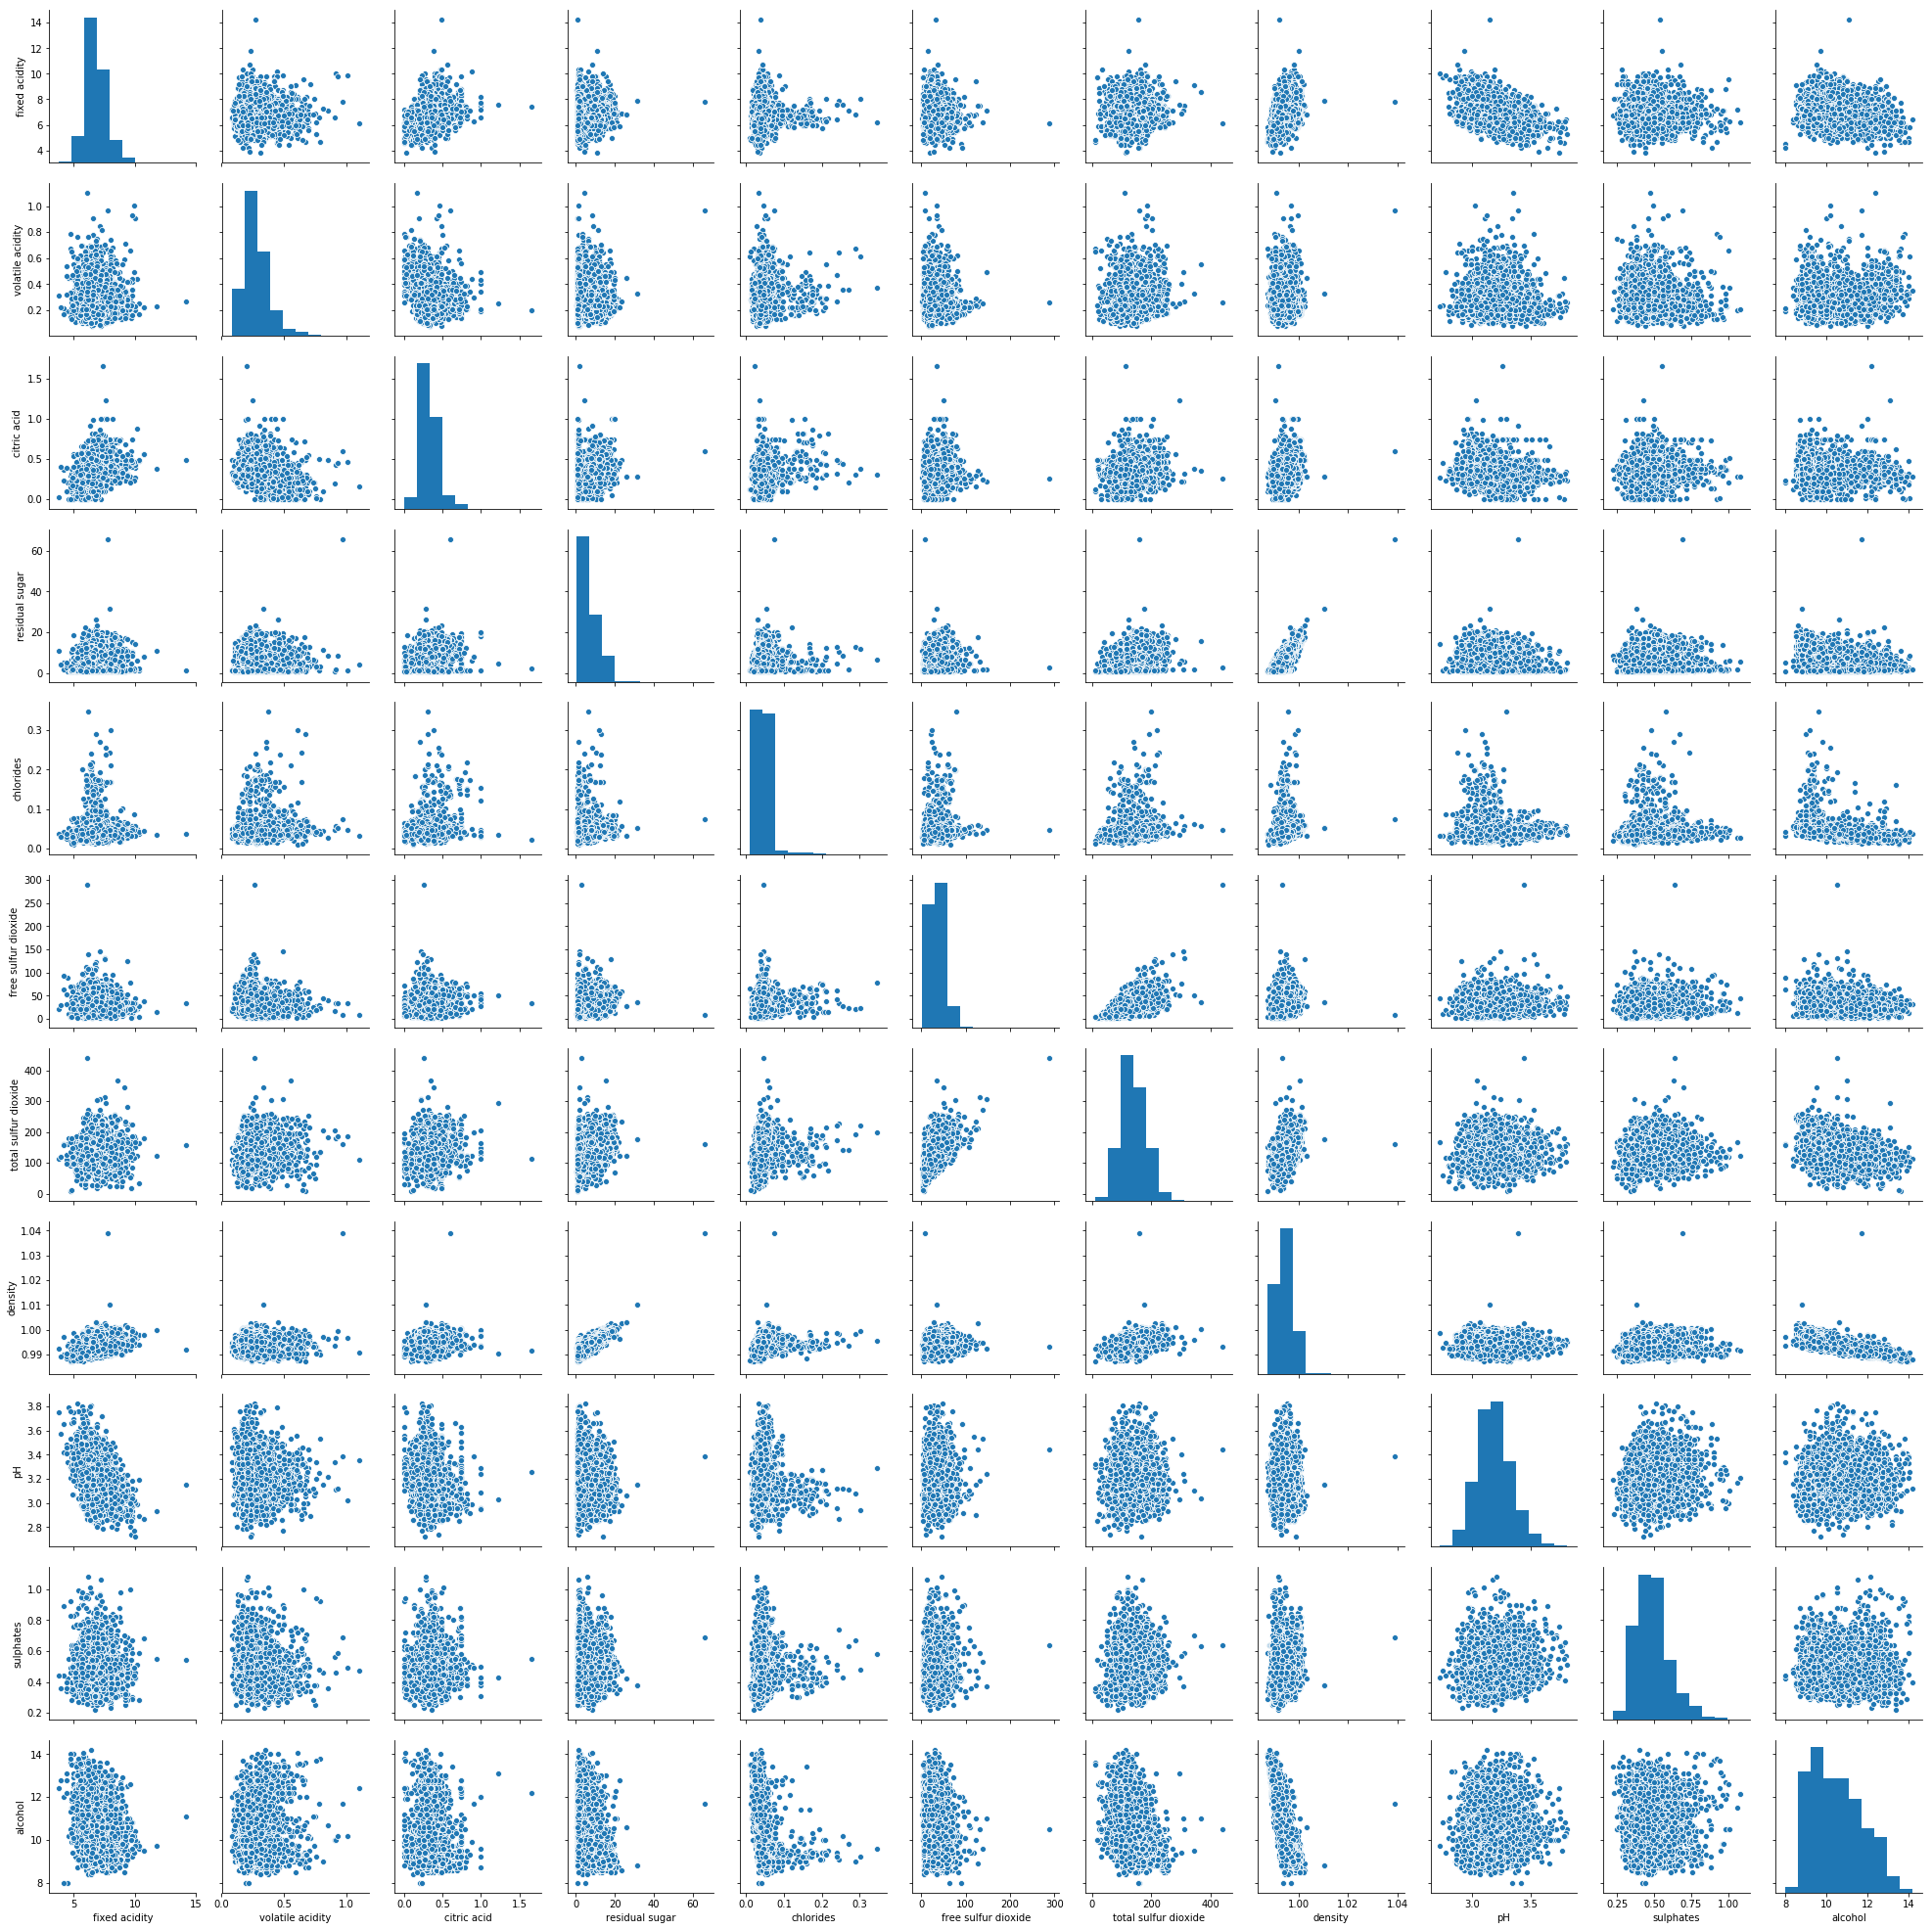

In [12]:
# Lets have a look at pair plot to see what values are correlated
import seaborn as sns
sns.pairplot(red[red.columns.values[:-3]])

Ostensibly, pH, citric acid and fixed acidity are correleated. As well as free sulfur dioxide and total sulfur dioxide. And sugar and alcohol with density.

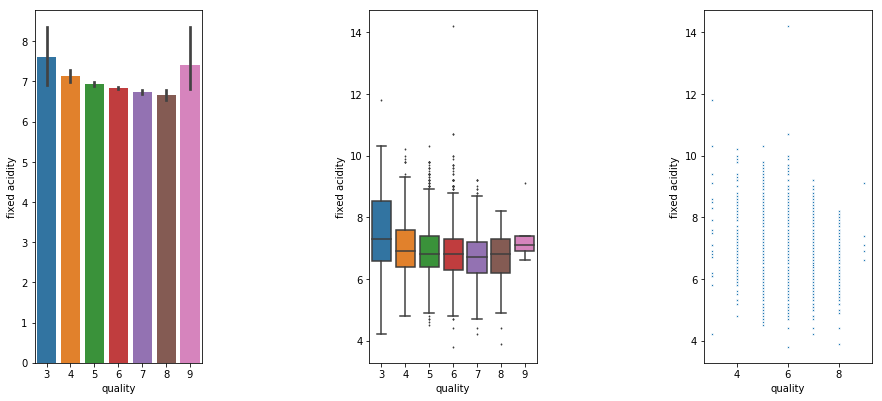

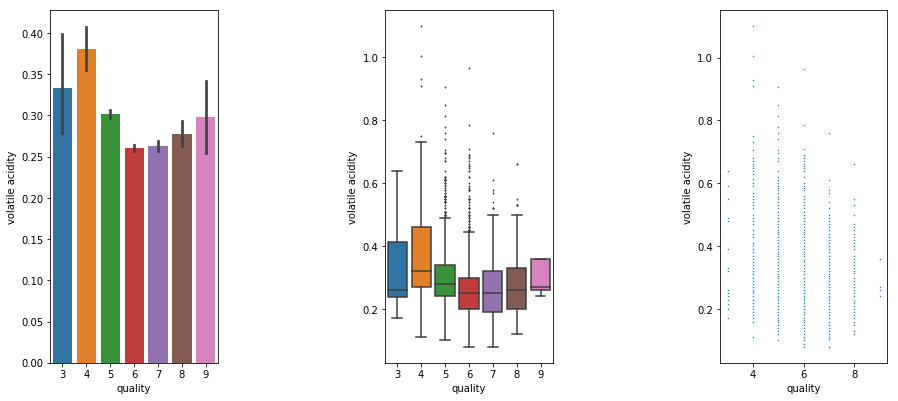

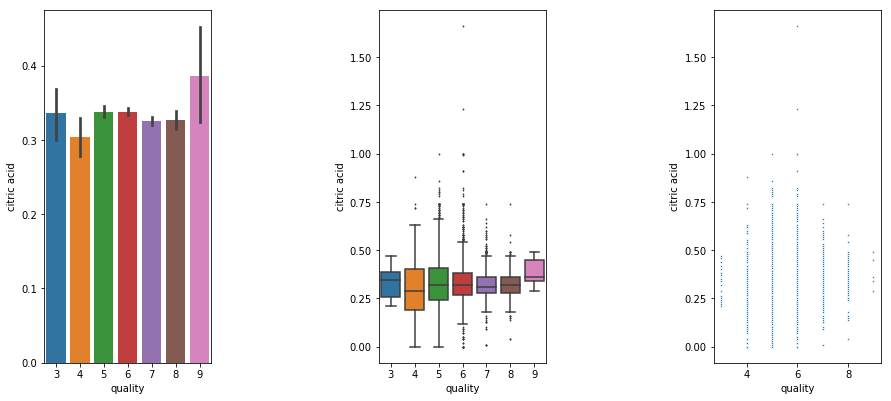

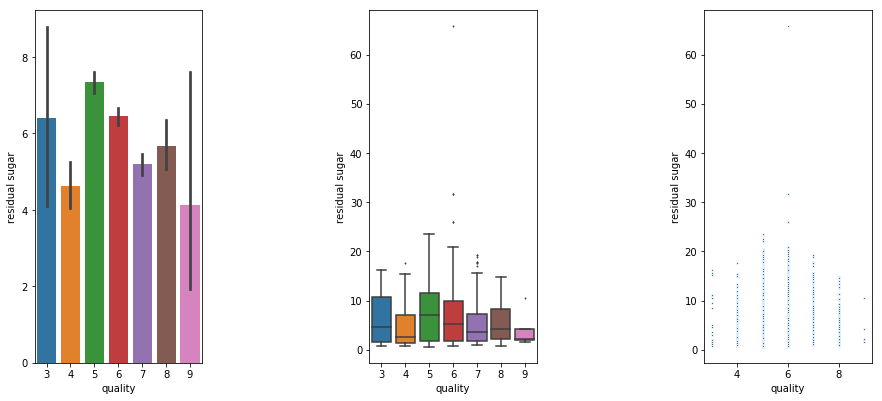

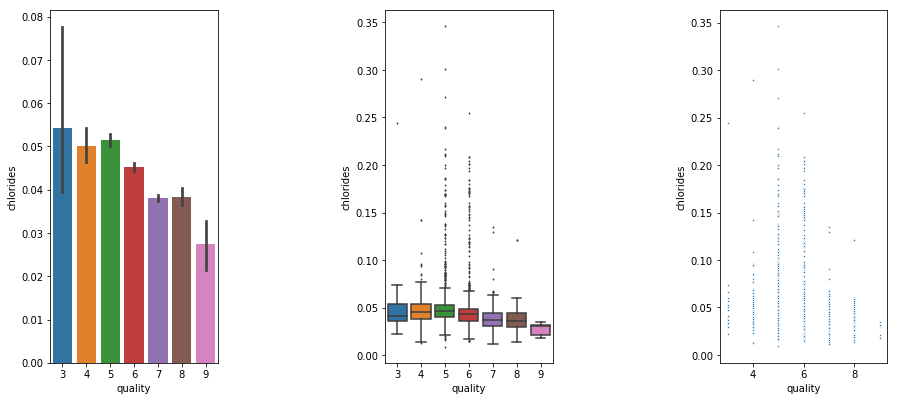

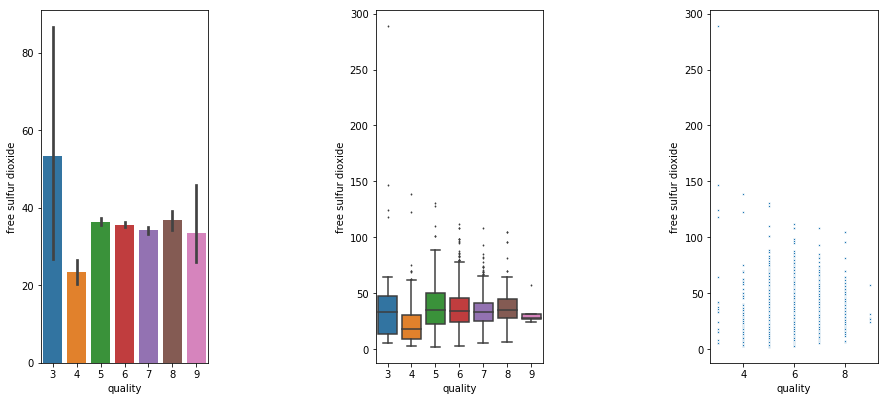

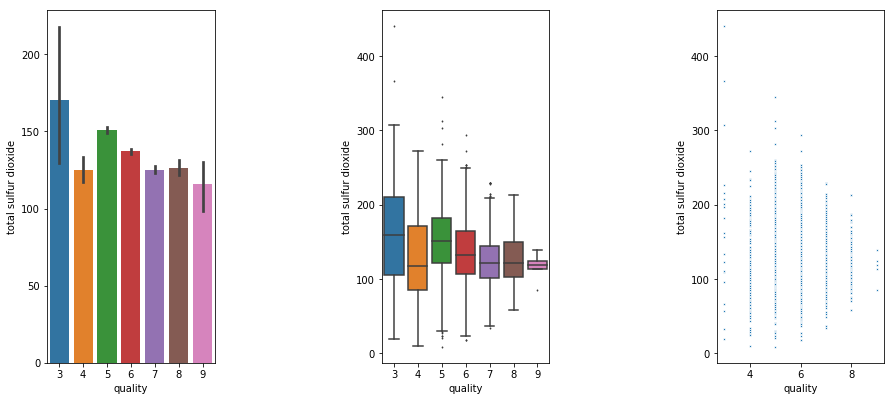

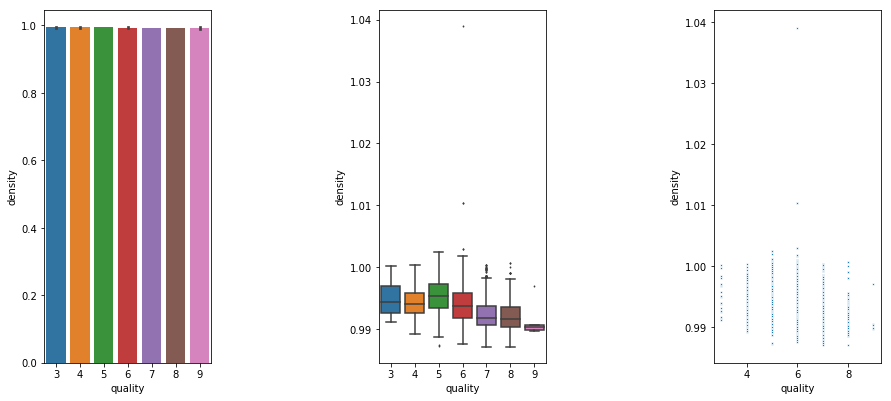

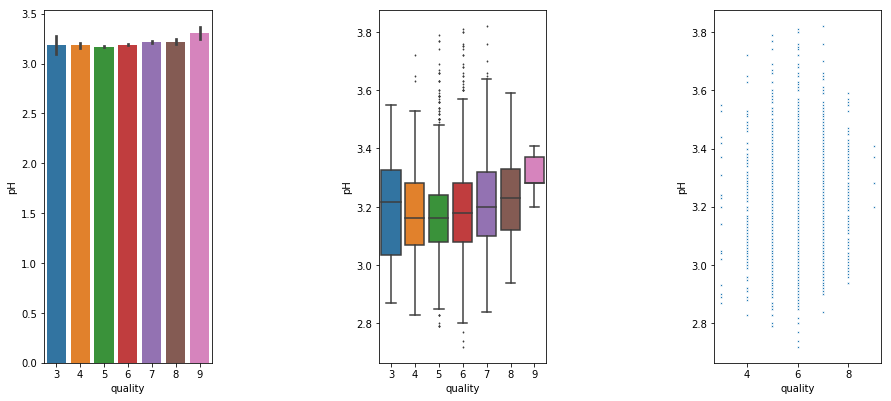

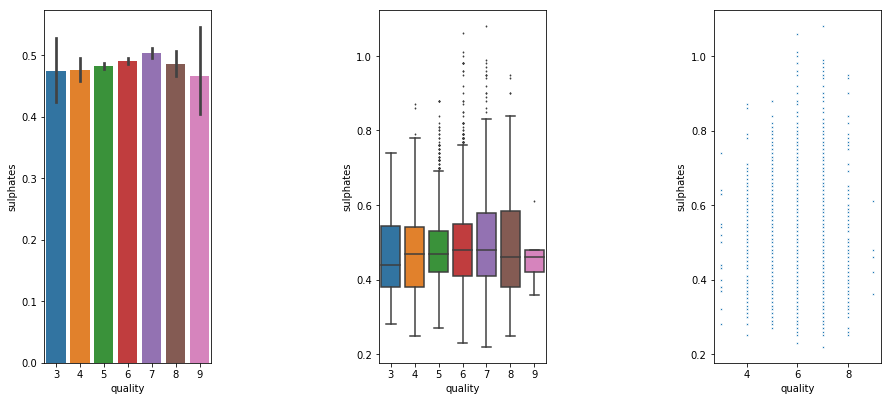

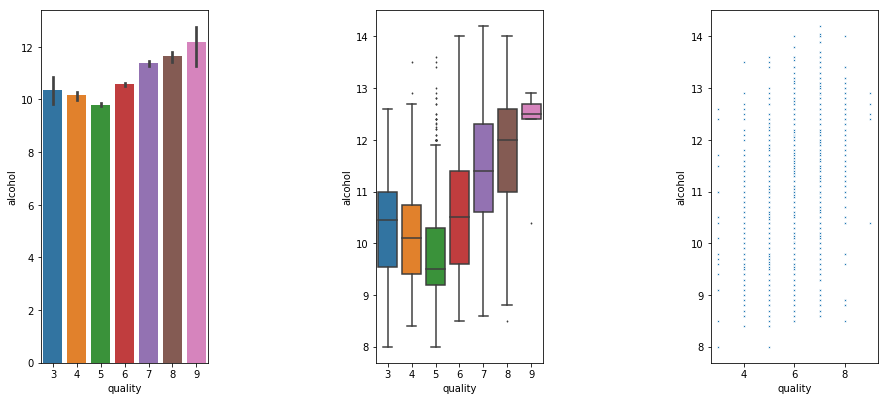

In [13]:
# Have a first look at the important features using Seaborn
for cv in red.columns.values[:-3]:
    #print(cv)
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15, 5)
    plt.subplots_adjust(top = 1, bottom=0.02, hspace=2.5, wspace=1)
    sns.barplot(x = 'quality', y = cv, data = red, ci=95.0, ax = ax[0])
    sns.boxplot(x = 'quality', y = cv, data = red,fliersize=1, ax = ax[1])
    sns.scatterplot(x = 'quality', y = cv, data = red, ax = ax[2], s=5)

We need to first rule out data that is not statistically significant (garbage in garbage out). It appears that the density data is not particularily useful, and the chlorides, alcohol content and residual sugar have statistical significance. Now lets try the ternary bin.

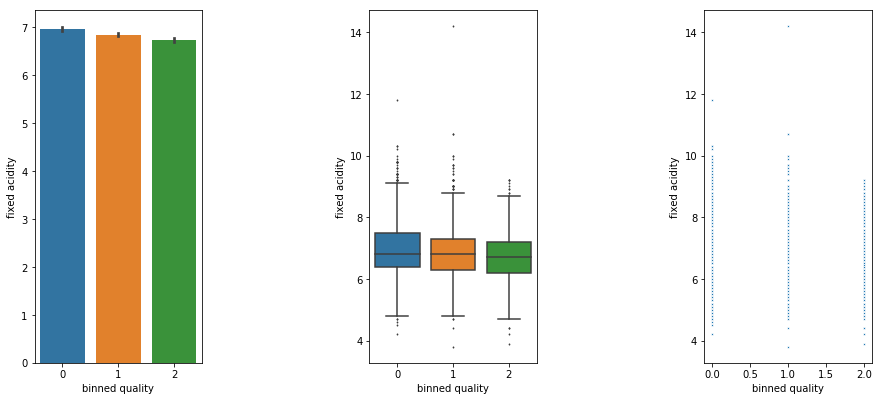

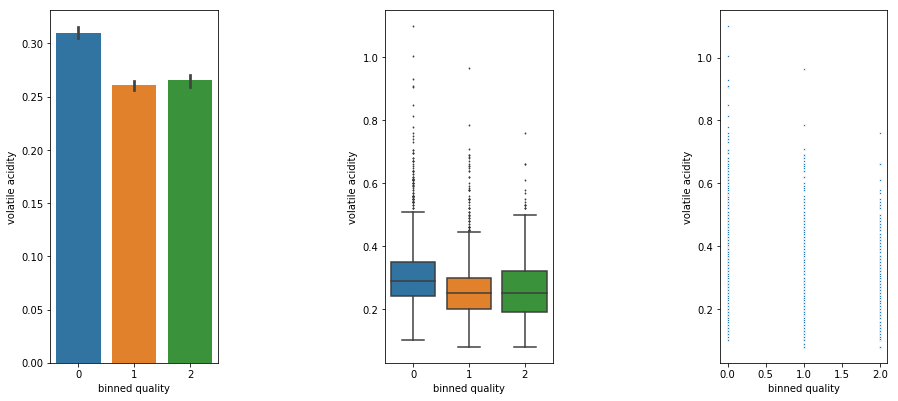

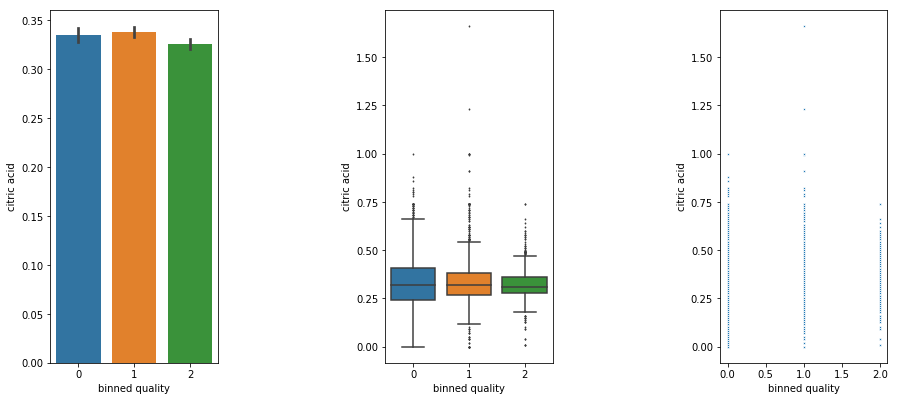

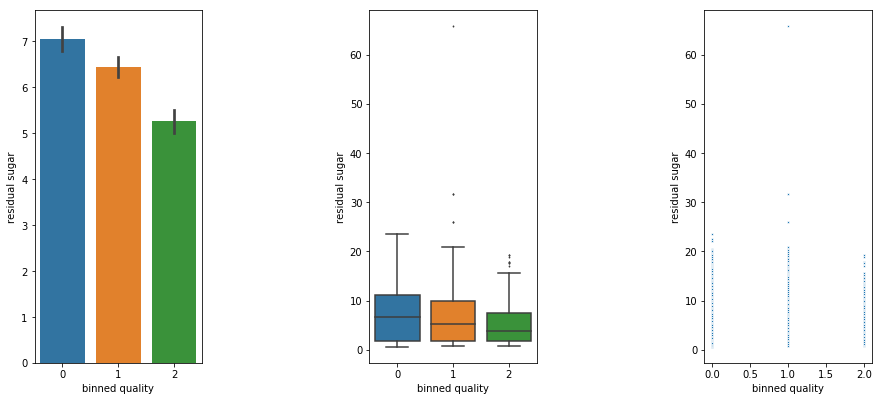

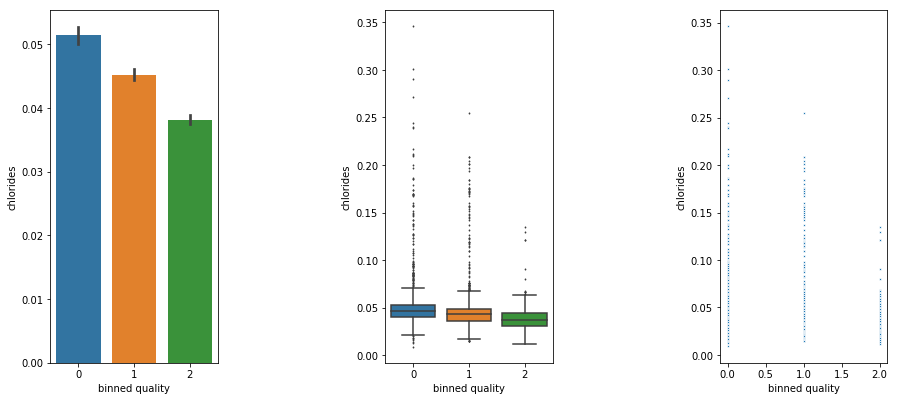

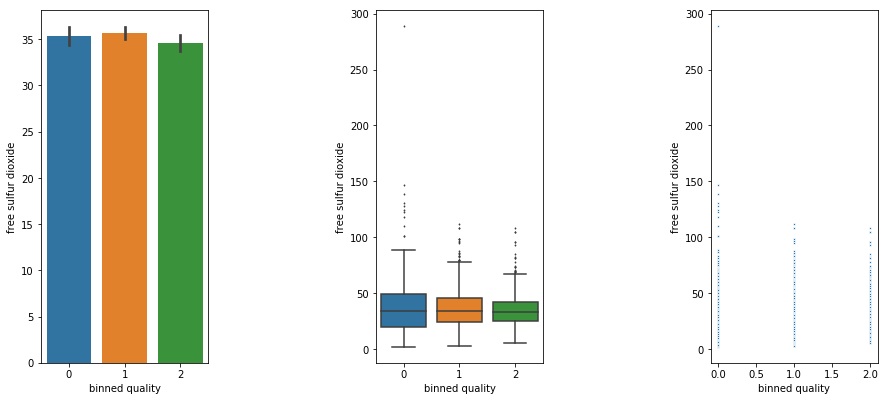

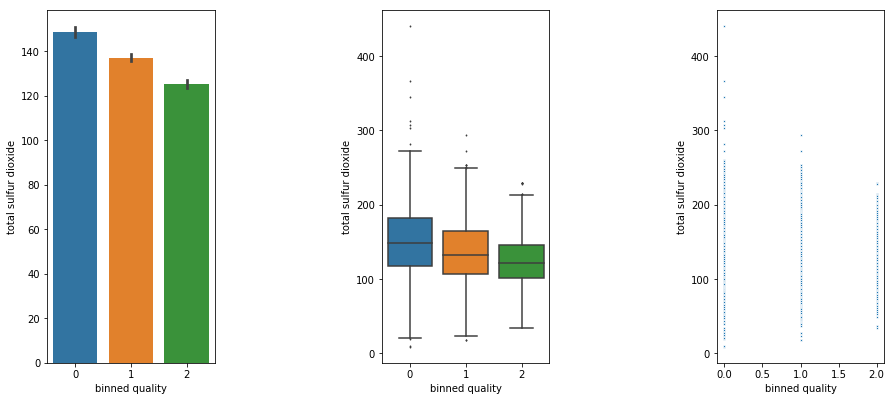

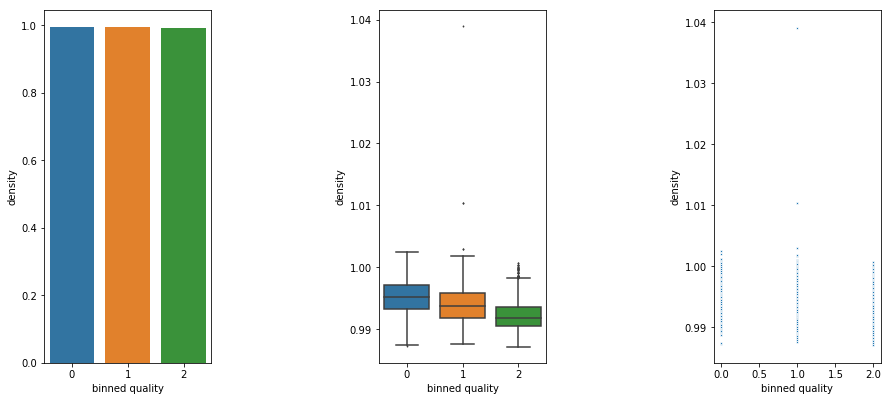

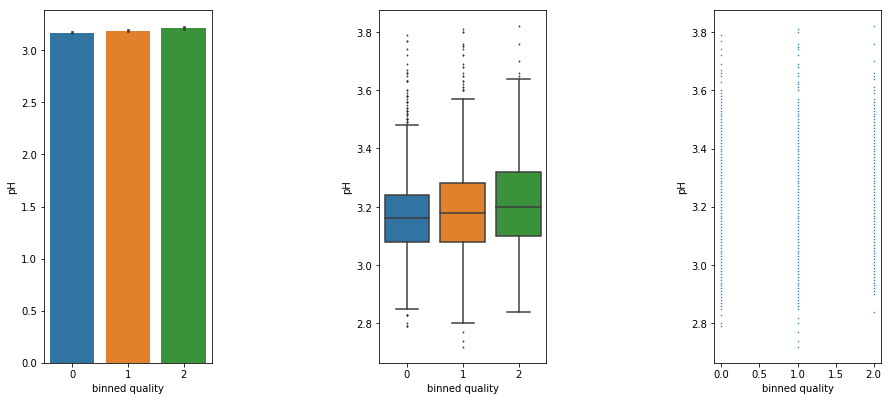

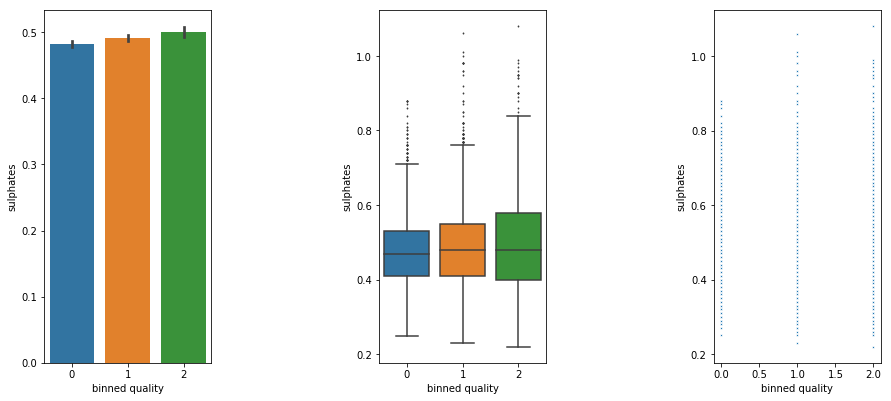

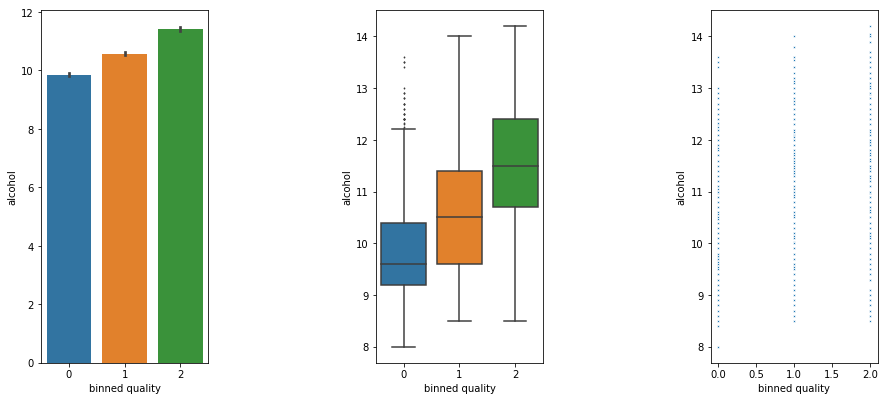

In [14]:
for cv in red.columns.values[:-3]:
    #print(cv)
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15, 5)
    plt.subplots_adjust(top = 1, bottom=0.02, hspace=2.5, wspace=1)
    sns.barplot(x = 'binned quality', y = cv, data = red, ci=95.0, ax = ax[0])
    sns.boxplot(x = 'binned quality', y = cv, data = red,fliersize=1, ax = ax[1])
    sns.scatterplot(x = 'binned quality', y = cv, data = red, ax = ax[2], s=5)

We can really start to see the challenge from these boxplots, which are plagued by wide ranging outliers and From this it overlapping boxes, which indicate the medians do not differ. Now lets try binary:

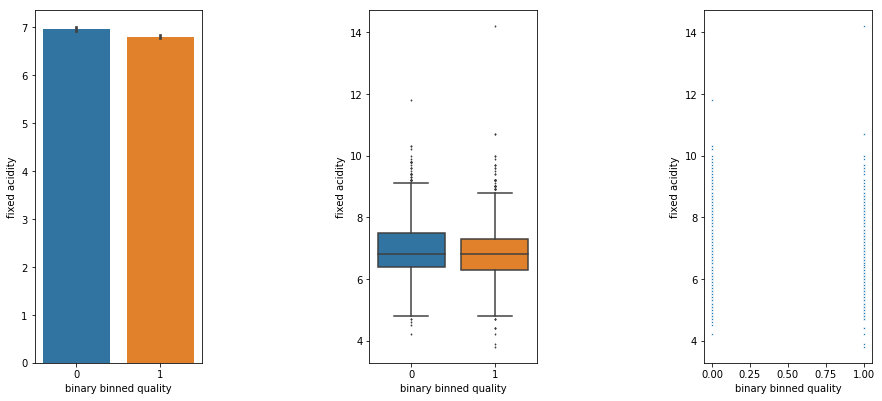

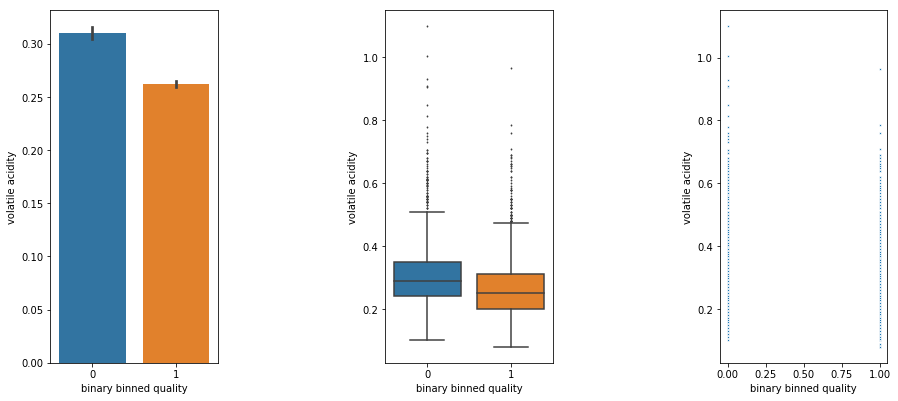

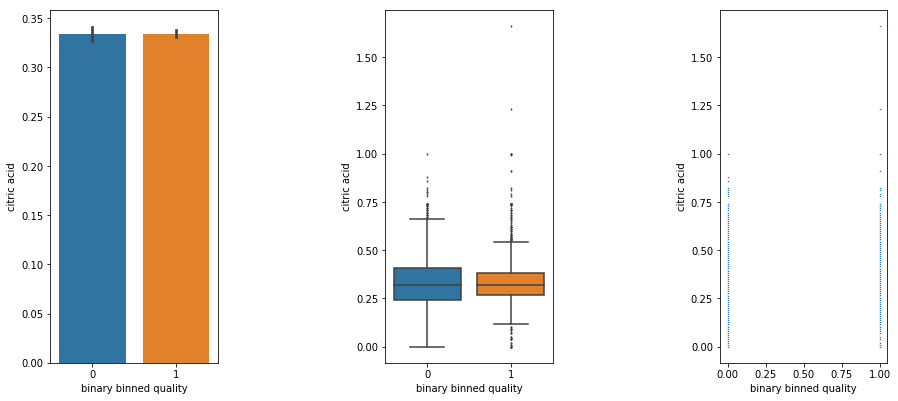

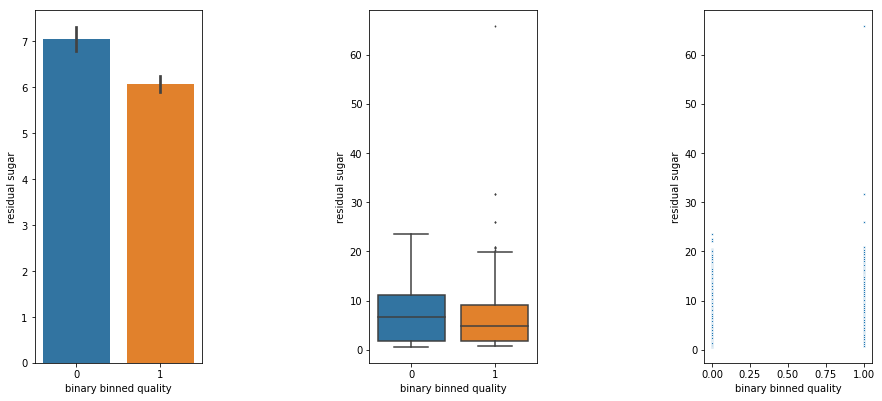

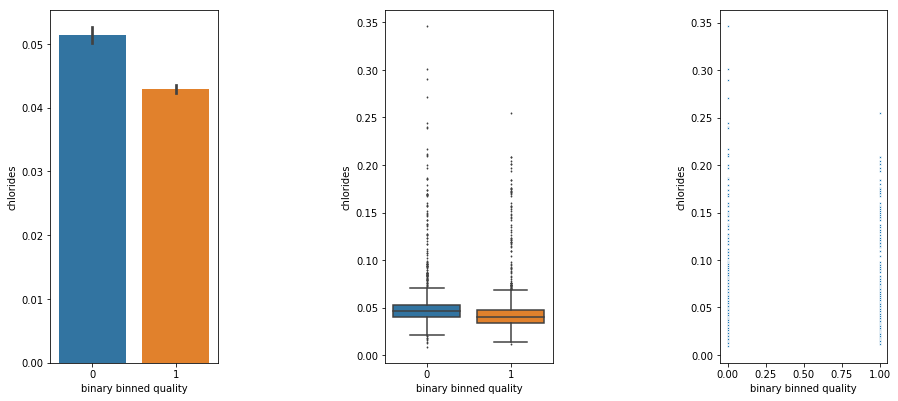

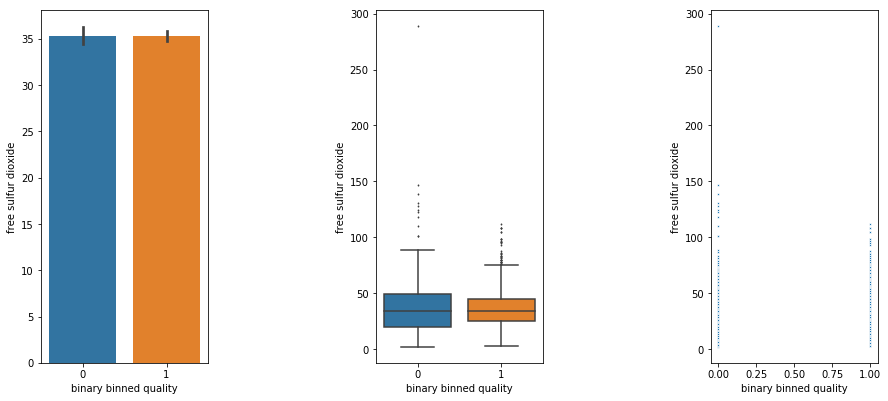

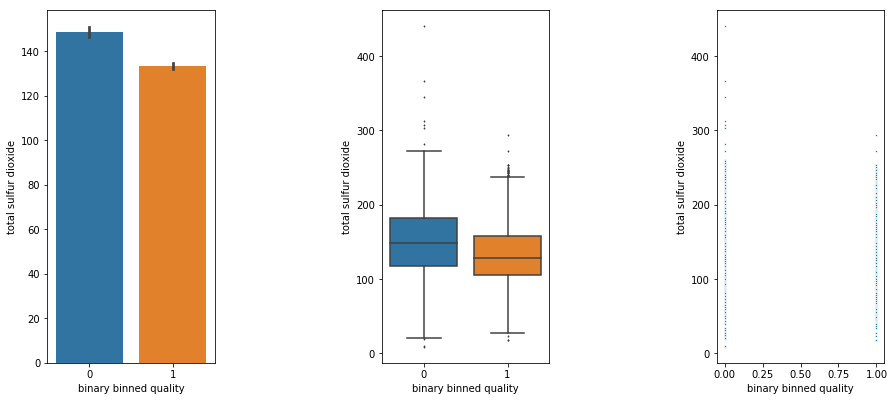

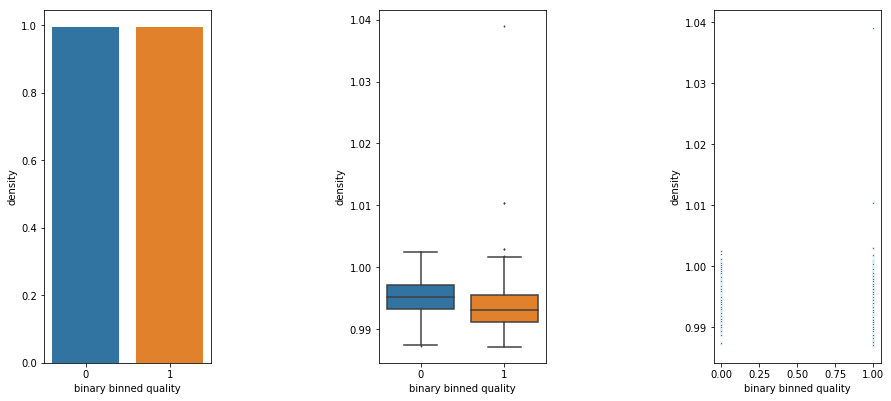

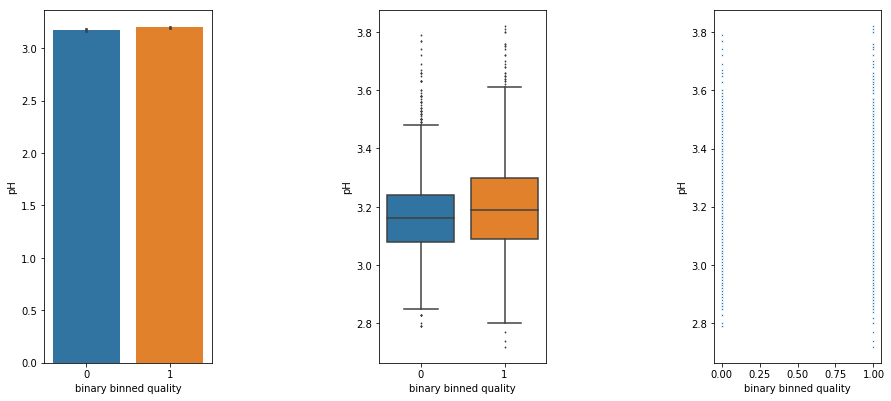

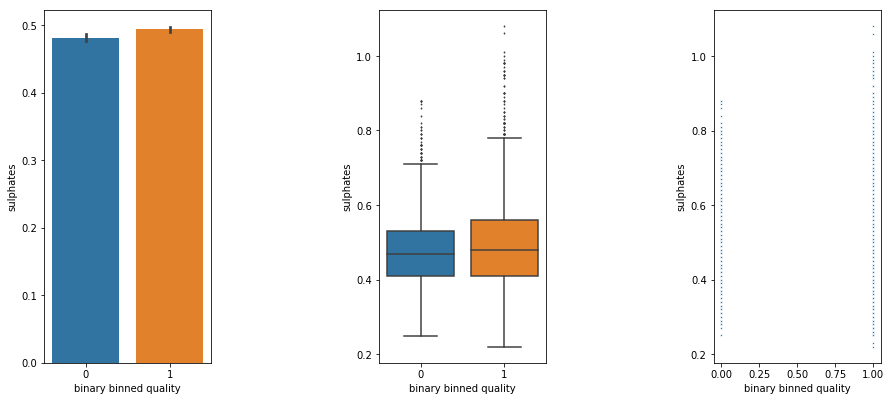

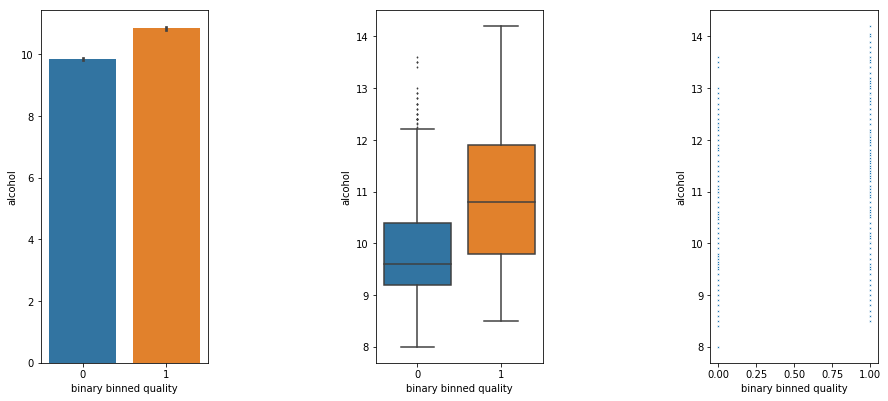

In [15]:
for cv in red.columns.values[:-3]:
    #print(cv)
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15, 5)
    plt.subplots_adjust(top = 1, bottom=0.02, hspace=2.5, wspace=1)
    sns.barplot(x = 'binary binned quality', y = cv, data = red, ci=95.0, ax = ax[0])
    sns.boxplot(x = 'binary binned quality', y = cv, data = red,fliersize=1, ax = ax[1])
    sns.scatterplot(x = 'binary binned quality', y = cv, data = red, ax = ax[2], s=5)

The data is slightly more symmetric now, though not highly statisticaly relevant. 

# Step 3
What kind of features can we use? It is important also to scale the X data, and to split into train and test sets.


In [199]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(red[red.columns.values[:-3]])
print('the shape of the scaled X data is', X_scaled.shape)

the shape of the scaled X data is (4898, 11)


In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.33, random_state=42)
print('X test data shape is {} and y tes data shape is {}'.format(X_test.shape, y_test.shape))
print('X train data shape is {} and y train data shape is {}'.format(X_train.shape, y_train.shape))

X test data shape is (1617, 11) and y tes data shape is (1617,)
X train data shape is (3281, 11) and y train data shape is (3281,)


The easist first step is to see if we can gain anything from dimensionality reduction.

ternary


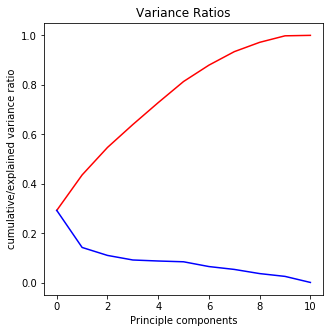

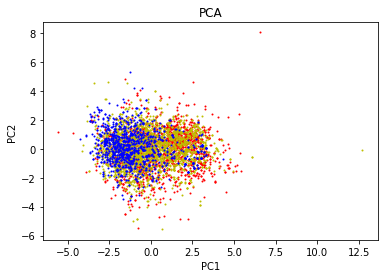

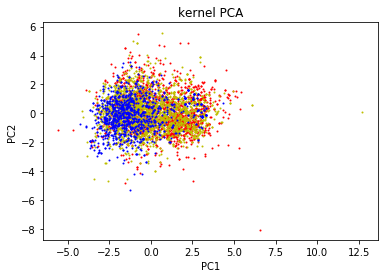

binary


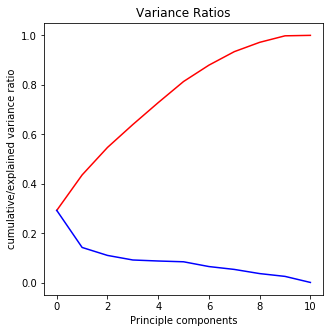

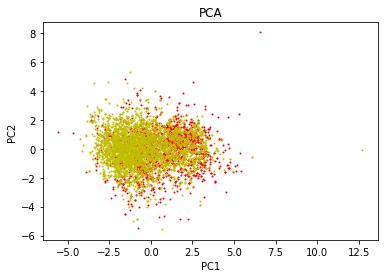

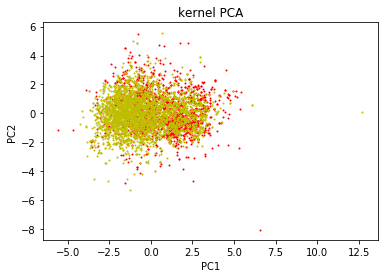

In [201]:
from sklearn.decomposition import PCA,KernelPCA
def PCA_wine(X_scaled, y):
    if np.max(y) == 1:
        print('binary')
    elif np.max(y) == 2:
        print('ternary')
    else:
        print('higher dimensions')
    pca=PCA(n_components=X_scaled.shape[1])
    x_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(5,5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r')
    plt.plot(pca.explained_variance_ratio_, 'b')
    plt.title('Variance Ratios')
    plt.xlabel('Principle components')
    plt.ylabel('cumulative/explained variance ratio')
    plt.show()

    # plot PCA
    for i, color in zip(range(3), 'ryb'):
        idx = np.where(y == i)
        plt.scatter(x_pca[idx, 0], x_pca[idx, 1], c=color, label=['low', 'mid', 'high'], cmap=plt.cm.RdYlBu, s=1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA')
    plt.show()

    # have a look at kernel PCA
    kpca=KernelPCA(n_components=X_scaled.shape[1])
    x_kpca = kpca.fit_transform(X_scaled)

    for i, color in zip(range(3), 'ryb'):
        idx = np.where(y == i)
        plt.scatter(x_kpca[idx, 0], x_kpca[idx, 1], c=color, label=['low', 'mid', 'high'], cmap=plt.cm.RdYlBu, s=1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('kernel PCA')
    plt.show()
    return x_pca, x_kpca

x_pca, x_kpca = PCA_wine(X_scaled,y_binned)
x_pca_binary, x_kpca_binary = PCA_wine(X_scaled,y_binned_binary)

Unfortuntely this dimensionality reduction does not obviate any clusters of data or signify that any principle components necessarily explain the variation (first 2 PCs less than 50% cumulative explaind vairance ratio). Just for completeness it appears that kernel PCA does not offer much assistance either.

# Step 4
Lets try a few models to see if anything simply models this data well. Here we have an assortment of classifiers which we train with scaled data or PCA transformed data:

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, balanced_accuracy_score

def kNN_wine(X_train, X_test, y_train, y_test):
    model_KNC = KNeighborsClassifier(n_neighbors=100).fit(X_train, y_train)
    y_pred = model_KNC.predict(X_test)
    score=balanced_accuracy_score(y_pred,y_test,adjusted=False)
    print('k nearest kneighbors',score*100)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return score

def RFC_wine(X_train, X_test, y_train, y_test):
    model_RFC = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
    y_pred=model_RFC.predict(X_test)
    score=balanced_accuracy_score(y_pred,y_test,adjusted=False)
    print('random forest',score*100)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return score
    
def LR_wine(X_train, X_test, y_train, y_test):
    model_LR = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_train, y_train)
    y_pred=model_LR.predict(X_test)
    score=balanced_accuracy_score(y_pred,y_test,adjusted=False)
    print('logistic regression',score*100)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return score

def GNB_wine(X_train, X_test, y_train, y_test):
    model_GNB = GaussianNB().fit(X_train, y_train)
    y_pred=model_GNB.predict(X_test)
    score=balanced_accuracy_score(y_pred,y_test,adjusted=False)
    print('gaussian naive bayes',score*100)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return score

def SVC_wine(X_train, X_test, y_train, y_test):
    model_SVC = SVC(gamma='auto').fit(X_train, y_train)
    y_pred=model_SVC.predict(X_test)
    score=balanced_accuracy_score(y_pred,y_test,adjusted=False)
    print('support vector',score*100)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return score
    

def run_analysis(X_train, X_test, y_train, y_test):
    result = [kNN_wine(X_train, X_test, y_train, y_test),
    RFC_wine(X_train, X_test, y_train, y_test),
    LR_wine(X_train, X_test, y_train, y_test),
    GNB_wine(X_train, X_test, y_train, y_test),
    SVC_wine(X_train, X_test, y_train, y_test)]
    return result

# Lets automate a few tests here simply:
def run_series_of_tests(x):
    # TEST 1: Ternary case
    X_train, X_test, y_train, y_test = train_test_split(x, y_binned, test_size = 0.33, random_state=43)
    test1 = run_analysis(X_train, X_test, y_train, y_test)

    # TEST 2: Binary Case
    X_train, X_test, y_train, y_test = train_test_split(x, y_binned_binary, test_size = 0.33, random_state=43)
    test2 = run_analysis(X_train, X_test, y_train, y_test)

    return {1:test1, 2:test2}

# Step 5
Using all the data we have at our disposal we can run the sequence of models:

In [253]:
# Test simply scaled X data:
result = run_series_of_tests(X_scaled)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 56.51141235082841
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       227
           1       0.52      0.61      0.56       218
           2       0.50      0.01      0.02        83

   micro avg       0.60      0.60      0.60       528
   macro avg       0.57      0.48      0.44       528
weighted avg       0.58      0.60      0.55       528

[[184  43   0]
 [ 85 132   1]
 [  5  77   1]]
random forest 69.28562316622018
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       227
           1       0.66      0.61      0.63       218
           2       0.70      0.57      0.63        83

   micro avg       0.69      0.69      0.69       528
   macro avg       0.69      0.67      0.68       528
weighted avg       0.69      0.69      0.69       528

[[186  39   2]
 [ 67 133  18]
 [  7  29  47]]
logistic regression 63.820934069875875
              precision    recall  f

In [254]:
# Test pca X data
result = run_series_of_tests(x_pca)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 56.51141235082841
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       227
           1       0.52      0.61      0.56       218
           2       0.50      0.01      0.02        83

   micro avg       0.60      0.60      0.60       528
   macro avg       0.57      0.48      0.44       528
weighted avg       0.58      0.60      0.55       528

[[184  43   0]
 [ 85 132   1]
 [  5  77   1]]
random forest 71.82730415718021
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       227
           1       0.66      0.61      0.63       218
           2       0.80      0.57      0.66        83

   micro avg       0.70      0.70      0.70       528
   macro avg       0.72      0.67      0.68       528
weighted avg       0.70      0.70      0.69       528

[[188  38   1]
 [ 75 132  11]
 [  5  31  47]]
logistic regression 63.820934069875875
              precision    recall  f

In [44]:
# Test kpca X data
result = run_series_of_tests(x_kpca)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 60.11827525844783
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       527
           1       0.54      0.68      0.60       728
           2       0.64      0.34      0.45       362

   micro avg       0.58      0.58      0.58      1617
   macro avg       0.60      0.54      0.55      1617
weighted avg       0.59      0.58      0.57      1617

[[319 201   7]
 [173 492  63]
 [ 18 220 124]]
random forest 72.27073625669335
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       527
           1       0.66      0.75      0.70       728
           2       0.78      0.57      0.66       362

   micro avg       0.70      0.70      0.70      1617
   macro avg       0.72      0.68      0.70      1617
weighted avg       0.71      0.70      0.70      1617

[[376 145   6]
 [127 549  52]
 [ 13 141 208]]
logistic regression 59.4811541567736
              precision    recall  f1-

Here we see that the best results with a random forest classifier. Note that a balanced accuracy score is used (average of recall on each class) as the X data is still relatively class imbalanced. The ternary case (test 1) is pretty impressive given that a coin flip is 33% and the RFC was accurate to 72% (and 81% accurate with a coin flip of 50% with binary classification).

Lets have a look at the confusion matrix, which shows that the low quality was correctly guessed 378 times and confused for high 6 times; that is to say if I had a cheap wine, the model would think it high quality 1.1 % of the time. Futher, if I had a high quality wine, it would be confused for low quality wine 2.8 % of the time. The most problematic part of this model is the mid range, where mid quality wine is confused for low quality wine 16.8 % of the time and confused for high quality wine 7% of the time (if I were a mid range wine seller I would not like this model very much).

[[378 143   6]

 [122 555  51]
 
 [ 10 141 211]]
 
For the binary case the, the low quality wine was confused for high quality wine 33% of the time, and the high quality wine was confused for low quality wine 10% of the time.

[[348 179]

 [104 986]]

To summarise these models, it appears that the ternary (low, mid, high) random forest classifier model has the best performance, with the caveat that the mid range accuracy is not particularily strong. 

Now lets try with picking more useful X data sets: fixed acidity, sugar, chlorides, sulfur dioxide, sulphates and alcohol content seem to be the most statistically useful data.

the shape of the scaled X data is (4898, 6)
ternary


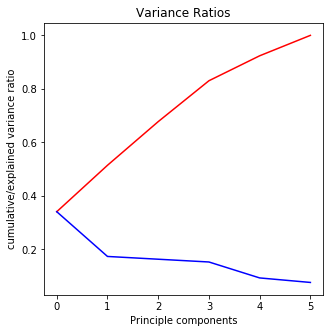

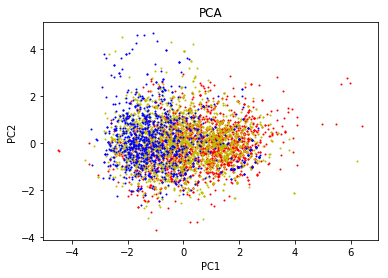

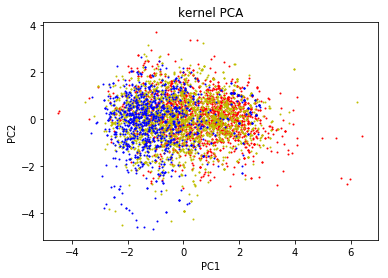

binary


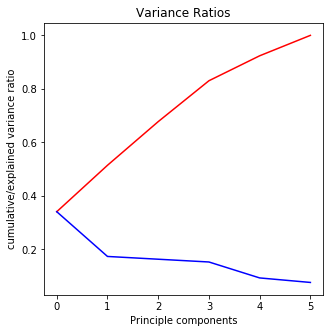

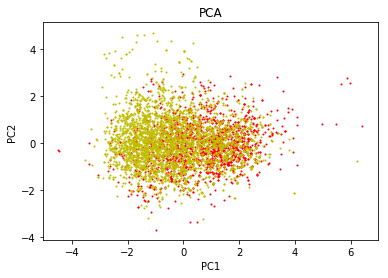

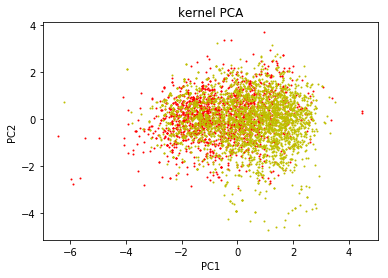

In [140]:
# input options;
#['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# Lets drop volatile acidity, citric acid, free sulfur dioxide, density, pH
X_scaled = sc.fit_transform(red[['fixed acidity','residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates' ,'alcohol']])
print('the shape of the scaled X data is', X_scaled.shape)

x_pca, x_kpca = PCA_wine(X_scaled,y_binned)
x_pca_binary, x_kpca_binary = PCA_wine(X_scaled,y_binned_binary)


In [54]:
result = run_series_of_tests(X_scaled)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 54.45996423952263
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       527
           1       0.52      0.60      0.56       728
           2       0.59      0.32      0.41       362

   micro avg       0.53      0.53      0.53      1617
   macro avg       0.54      0.50      0.51      1617
weighted avg       0.54      0.53      0.52      1617

[[309 212   6]
 [219 434  75]
 [ 58 189 115]]
random forest 69.45993402843698
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       527
           1       0.64      0.74      0.69       728
           2       0.74      0.59      0.65       362

   micro avg       0.68      0.68      0.68      1617
   macro avg       0.69      0.66      0.67      1617
weighted avg       0.68      0.68      0.68      1617

[[344 173  10]
 [124 538  66]
 [ 18 131 213]]
logistic regression 55.86836177428446
              precision    recall  f1

In [47]:
result = run_series_of_tests(x_pca)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 54.45996423952263
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       527
           1       0.52      0.60      0.56       728
           2       0.59      0.32      0.41       362

   micro avg       0.53      0.53      0.53      1617
   macro avg       0.54      0.50      0.51      1617
weighted avg       0.54      0.53      0.52      1617

[[309 212   6]
 [219 434  75]
 [ 58 189 115]]
random forest 67.67010458483995
              precision    recall  f1-score   support

           0       0.68      0.64      0.65       527
           1       0.63      0.71      0.67       728
           2       0.73      0.60      0.66       362

   micro avg       0.66      0.66      0.66      1617
   macro avg       0.68      0.65      0.66      1617
weighted avg       0.67      0.66      0.66      1617

[[335 177  15]
 [145 517  66]
 [ 16 130 216]]
logistic regression 55.86836177428446
              precision    recall  f1

In [48]:
result = run_series_of_tests(x_kpca)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 54.45996423952263
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       527
           1       0.52      0.60      0.56       728
           2       0.59      0.32      0.41       362

   micro avg       0.53      0.53      0.53      1617
   macro avg       0.54      0.50      0.51      1617
weighted avg       0.54      0.53      0.52      1617

[[309 212   6]
 [219 434  75]
 [ 58 189 115]]
random forest 67.63046799491632
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       527
           1       0.62      0.71      0.66       728
           2       0.73      0.57      0.64       362

   micro avg       0.66      0.66      0.66      1617
   macro avg       0.68      0.64      0.65      1617
weighted avg       0.66      0.66      0.66      1617

[[337 182   8]
 [145 516  67]
 [ 16 138 208]]
logistic regression 55.86836177428446
              precision    recall  f1

Interestingly, the accuracy score drops a little bit. 

the shape of the scaled X data is (4898, 4)
ternary


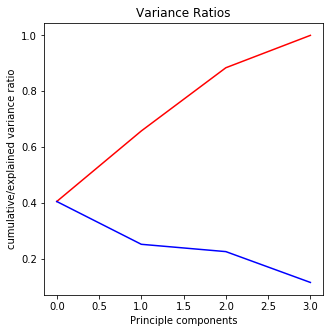

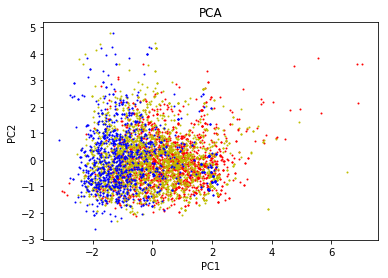

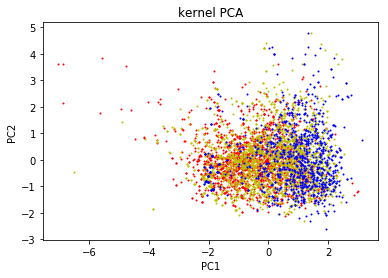

binary


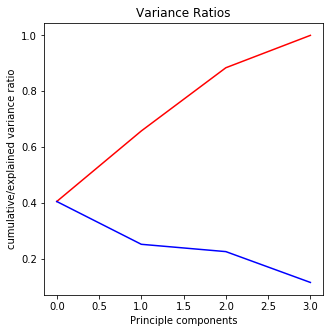

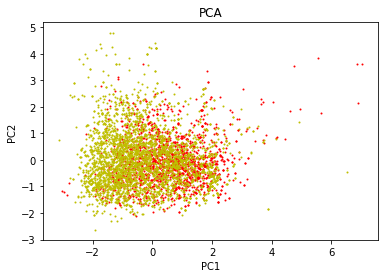

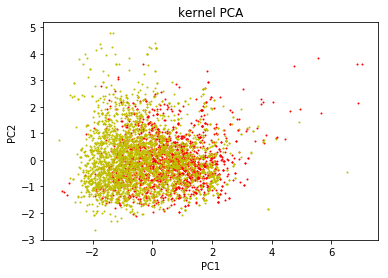

In [49]:
# Lets simply further and try only a few of the key components
X_scaled = sc.fit_transform(red[['residual sugar', 'chlorides', 'sulphates' ,'alcohol']])
print('the shape of the scaled X data is', X_scaled.shape)

x_pca, x_kpca = PCA_wine(X_scaled,y_binned)
x_pca_binary, x_kpca_binary = PCA_wine(X_scaled,y_binned_binary)


In [50]:
result = run_series_of_tests(X_scaled)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 54.26928858125801
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       527
           1       0.50      0.62      0.56       728
           2       0.57      0.30      0.39       362

   micro avg       0.53      0.53      0.53      1617
   macro avg       0.54      0.49      0.50      1617
weighted avg       0.53      0.53      0.52      1617

[[290 230   7]
 [201 454  73]
 [ 36 218 108]]
random forest 64.35344355554756
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       527
           1       0.62      0.66      0.64       728
           2       0.67      0.57      0.62       362

   micro avg       0.64      0.64      0.64      1617
   macro avg       0.64      0.63      0.63      1617
weighted avg       0.64      0.64      0.64      1617

[[341 165  21]
 [162 483  83]
 [ 29 126 207]]
logistic regression 55.20807429319392
              precision    recall  f1

In [51]:
result = run_series_of_tests(x_pca)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 54.26928858125801
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       527
           1       0.50      0.62      0.56       728
           2       0.57      0.30      0.39       362

   micro avg       0.53      0.53      0.53      1617
   macro avg       0.54      0.49      0.50      1617
weighted avg       0.53      0.53      0.52      1617

[[290 230   7]
 [201 454  73]
 [ 36 218 108]]
random forest 63.20880189536273
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       527
           1       0.61      0.65      0.63       728
           2       0.66      0.59      0.62       362

   micro avg       0.63      0.63      0.63      1617
   macro avg       0.63      0.62      0.63      1617
weighted avg       0.63      0.63      0.63      1617

[[327 176  24]
 [168 472  88]
 [ 28 120 214]]
logistic regression 55.20807429319392
              precision    recall  f1

In [52]:
result = run_series_of_tests(x_kpca)
for r in result:
    print('test',r)
    print(result[r])

k nearest kneighbors 54.26928858125801
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       527
           1       0.50      0.62      0.56       728
           2       0.57      0.30      0.39       362

   micro avg       0.53      0.53      0.53      1617
   macro avg       0.54      0.49      0.50      1617
weighted avg       0.53      0.53      0.52      1617

[[290 230   7]
 [201 454  73]
 [ 36 218 108]]
random forest 62.6296802612592
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       527
           1       0.61      0.64      0.63       728
           2       0.65      0.56      0.60       362

   micro avg       0.62      0.62      0.62      1617
   macro avg       0.63      0.61      0.62      1617
weighted avg       0.62      0.62      0.62      1617

[[331 175  21]
 [169 469  90]
 [ 32 126 204]]
logistic regression 55.20807429319392
              precision    recall  f1-

Decreasing the feature space incurs a further loss of accuracy. It appears that even the less statistically significant data is also useful. Lets try something else now, for completeness, maybe we can squeeze out better results from a neural network.

# Neural Network

In [202]:
sc = StandardScaler()
X_scaled = sc.fit_transform(red[red.columns.values[:-3]])
print('the shape of the scaled X data is', X_scaled.shape)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned_binary, test_size=0.33, random_state=42)
print('X test data shape is {} and y tes data shape is {}'.format(X_test.shape, y_test.shape))
print('X train data shape is {} and y train data shape is {}'.format(X_train.shape, y_train.shape))

the shape of the scaled X data is (4898, 11)
X test data shape is (1617, 11) and y tes data shape is (1617,)
X train data shape is (3281, 11) and y train data shape is (3281,)


In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D

# create model
'''model = Sequential()
model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(np.max(y_binned)+1, activation='softmax'))'''

model = Sequential()
model.add(Conv1D(99, 10, activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(MaxPooling1D(2))
#model.add(Conv1D(50, 2, activation='relu'))
model.add(GlobalAveragePooling1D())

#model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(np.max(y_binned)+1, activation='softmax'))
print(model.summary())


# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 2, 99)             1089      
_________________________________________________________________
global_average_pooling1d_21  (None, 99)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1000      
_________________________________________________________________
dropout_48 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 3)                 33        
Total params: 2,122
Trainable params: 2,122
Non-trainable params: 0
_________________________________________________________________
None


In [208]:
# Fit the model
X_train_cnn = np.expand_dims(X_train,axis=2)
X_train_cnn.shape
history = model.fit(X_train_cnn, y_train, validation_split=0.33, epochs=50, batch_size=100)

Train on 2198 samples, validate on 1083 samples
Epoch 1/50
2198/2198 [==============================] - 2s 799us/step - loss: 1.0691 - acc: 0.4945 - val_loss: 1.0051 - val_acc: 0.6676
Epoch 2/50
2198/2198 [==============================] - 0s 47us/step - loss: 0.9608 - acc: 0.6433 - val_loss: 0.8878 - val_acc: 0.6888
Epoch 3/50
2198/2198 [==============================] - 0s 51us/step - loss: 0.8722 - acc: 0.6706 - val_loss: 0.7803 - val_acc: 0.7027
Epoch 4/50
2198/2198 [==============================] - 0s 50us/step - loss: 0.7860 - acc: 0.6915 - val_loss: 0.6983 - val_acc: 0.7008
Epoch 5/50
2198/2198 [==============================] - 0s 55us/step - loss: 0.7498 - acc: 0.6824 - val_loss: 0.6469 - val_acc: 0.7202
Epoch 6/50
2198/2198 [==============================] - 0s 57us/step - loss: 0.7166 - acc: 0.6838 - val_loss: 0.6168 - val_acc: 0.7211
Epoch 7/50
2198/2198 [==============================] - 0s 56us/step - loss: 0.6966 - acc: 0.6856 - val_loss: 0.5961 - val_acc: 0.7341
Epoch 

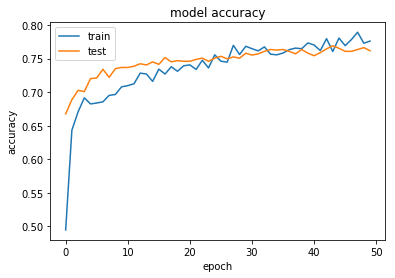

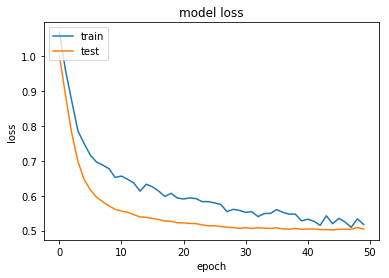

In [209]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [210]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
X_test_cnn = np.expand_dims(X_test,axis=2)
y_pred = np.argmax(model.predict(X_test_cnn),axis=1)
score=balanced_accuracy_score(y_pred,y_test)
print('accuracy score:\n',score)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('\nconfusion matrix:\n',cnf_matrix)
print('\nclassification report:\n',classification_report(y_test, y_pred))

accuracy score:
 0.7355067120370637

confusion matrix:
 [[323 202]
 [173 919]]

classification report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.63       525
           1       0.82      0.84      0.83      1092

   micro avg       0.77      0.77      0.77      1617
   macro avg       0.74      0.73      0.73      1617
weighted avg       0.77      0.77      0.77      1617



The best result (not far from the random forest classifier) can be found for the binary case at 74% accuracy, and ternary case at 59 %, so we aren't faring any better with a standard neural network. We can try a convolutional neural network with a similar result.

*Note that PCA doesn't add too much value for NNs. But as can be seen from the confusion matrix, there is stil some significant errors.

# Try white wine as well

We can run the random forest classifier as well to see how it compares.

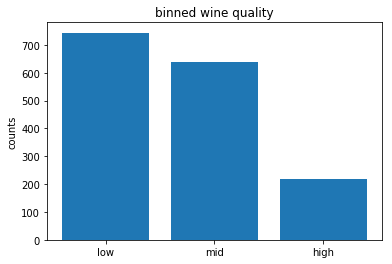

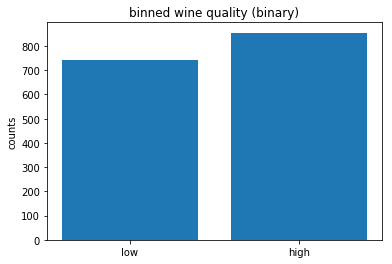

In [251]:
# initialize y binning and counts
y_binned = []
count_low = 0
count_mid = 0
count_high = 0
# enuermate the list of quality

for k,r in enumerate(white['quality']):
    if r < 6:
        y_binned.append(0)
        count_low +=1
    elif r == 6:
        y_binned.append(1)
        count_mid +=1
    elif r >6:
        y_binned.append(2)
        count_high +=1

# turn list into numpy array
y_binned = np.array(y_binned)
plt.bar(np.arange(3), [count_low, count_mid, count_high])
plt.xticks(np.arange(3), ['low', 'mid', 'high'])
plt.ylabel('counts')
plt.title('binned wine quality')
plt.show()
white['binned quality'] = y_binned


# We can also look at the simpler binary case:
y_binned_binary = []
count_low = 0
count_high = 0
# enuermate the list of quality

for k,r in enumerate(white['quality']):
    if r <= 5:
        y_binned_binary.append(0)
        count_low +=1
    else:
        y_binned_binary.append(1)
        count_high +=1
        
# turn list into numpy array
y_binned_binary = np.array(y_binned_binary)
plt.bar(np.arange(2), [count_low, count_high])
plt.xticks(np.arange(2), ['low', 'high'])
plt.ylabel('counts')
plt.title('binned wine quality (binary)')
plt.show()
white['binary binned quality'] = y_binned_binary


the shape of the scaled X data is (1599, 11)
ternary


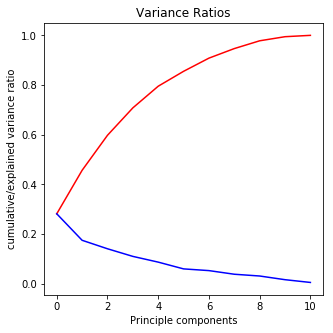

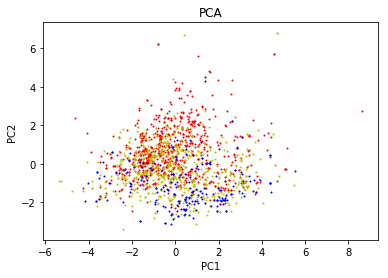

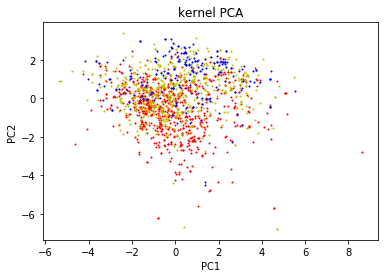

binary


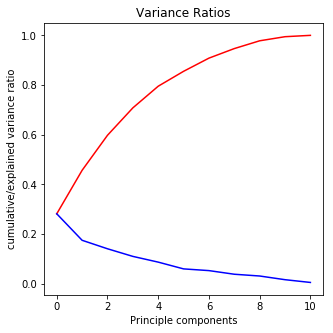

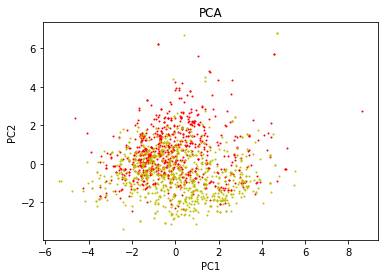

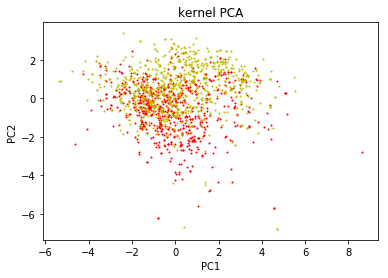

In [252]:
sc = StandardScaler()
X_scaled = sc.fit_transform(white[white.columns.values[:-3]])
print('the shape of the scaled X data is', X_scaled.shape)

x_pca, x_kpca = PCA_wine(X_scaled,y_binned)
x_pca_binary, x_kpca_binary = PCA_wine(X_scaled,y_binned_binary)

In [249]:
# Binary Case
    
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned_binary, test_size=0.33, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred=model_RFC.predict(X_test)
score=balanced_accuracy_score(y_pred,y_test)
print('random forest',score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


random forest 79.36507936507937
[[182  56]
 [ 52 238]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       238
           1       0.81      0.82      0.82       290

   micro avg       0.80      0.80      0.80       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.80      0.80      0.80       528



In [250]:
# Ternary Case
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.33, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred=model_RFC.predict(X_test)
score=balanced_accuracy_score(y_pred,y_test)
print('random forest',score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random forest 66.96367063425966
[[187  48   3]
 [ 51 142  20]
 [  3  38  36]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       238
           1       0.62      0.67      0.64       213
           2       0.61      0.47      0.53        77

   micro avg       0.69      0.69      0.69       528
   macro avg       0.67      0.64      0.65       528
weighted avg       0.69      0.69      0.69       528



Here we have similar results (unforunately, we have smaller data sets), 80 % accuracy and 66 % for binary and ternary random forest classification. For the ternary case, the low qualtiy wine is confused for high quality wine 1.3 % of the time, and the high quality wine is confused for low quality wine 3.8 % of the time. Again, the mid range wine is problematic as 24 % of the mid range is misclassed as low quality, and 9.3 % is misclassed as high quality.

Interestingly, if you run the red wine model with the white wine data you get very similar results (69 % and 80 % respectively)

# Conclusions
For both red and white wine, as the data is very sparse at the high and low end of the spectra, machine learning algorithms can't really be performed for each quality level and must be binned into the larger categories: 'high and low' (binary), and 'high, mid, low'(ternary). Though we get 77-80% accuracy for the binary case, that is not particularily impressive as a random guess would be 50%. For the ternary case (low, mid, high) we can actually get an accuracy of ~70%, which is actually a bit more impressive given that a random guess is ~33%.

There are other solutions for this model given online which claim 90% accuracy or higher, however by closer inspection, they do not take into account for class imbalance, and in fact are training on very small numbers of high quality wines and a very large number low quality wines. When they classify all wines as low quality then of course they will be accuracy 99 percent of the time if 99/100 wines are classed as low quality. 
